<a href="https://colab.research.google.com/github/toba717/ACM_AI_Projects/blob/main/Logistic_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression Final Project**
Takao Oba

ACM AI

# We will be generating a model utilizing logistic regression 

In [25]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
# set the random seed
np.random.seed(0)

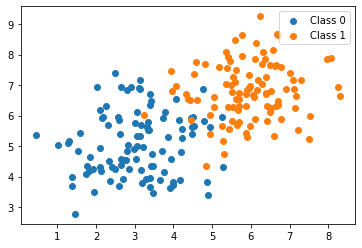

In [27]:
# create data
x11 = np.random.normal(loc=3, size=100)
x12 = np.random.normal(loc=5, size=100)

x0 = np.stack((x11, x12)).T

x21 = np.random.normal(loc=6, size=100)
x22 = np.random.normal(loc=7, size=100)

x1 = np.stack((x21, x22)).T

X_ori = np.zeros((200, 2))
y_ori = np.zeros(200)
y_ori[100:] = 1
X_ori[:100] = x0
X_ori[100:] = x1

indicies = np.random.choice(np.arange(200), replace=False, size=200)
X = np.zeros((200, 2))
y = np.zeros(200)
X = X_ori[indicies]
y = y_ori[indicies]

plt.scatter(x11, x12, label='Class 0')
plt.scatter(x21, x22, label='Class 1')
plt.legend()

# augment with 1's

# X = np.hstack((np.ones((200, 1)), X))

In [28]:
# shape
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (200, 2)
Shape of y: (200,)


In [29]:
# Split training and test data with train_test_split - 1 line
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

###**Classes in Python**

In [30]:
class Rectangle: 

  def __init__(self, b, h): 
      self.b = b 
      self.h = h 
  def area(self): 
      return self.b*self.h 
  def perimeter(self): 
      # TO DO 
      return self.b*2 + self.h*2
      

In [31]:
my_rect = Rectangle(3, 5) 
print("Area: ", my_rect.area())
print("Perimeter: ", my_rect.perimeter())

Area:  15
Perimeter:  16


# $$\textbf{Brief Review of Logistic Regression}$$
#### N: number of samples
#### f: number of features
#### X: data; shape = (N, f)
#### y: labels/targets; shape = (N, )
#### W: weights; shape = (f, )
#### b: bias; scalar
#### a: learning rate; scalar

## $$\textbf{Our hypothesis}$$
### $$\hat{y}(X)=\sigma{(XW+b)}$$

## $$\textbf{Loss function - Binary Cross Entropy}$$
### $$L(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N}\big(y_i\log(\hat{y_i}) + (1-y_i)\log(1-\hat{y_i})\big) $$

## $$\textbf{Gradients of Loss with respect to W, b}$$
### $$ \frac{\partial L}{\partial W} = \frac{2}{N}X^T\big(\hat{y}-y\big)$$
### $$ \frac{\partial L}{\partial b} = \frac{2}{N}\sum_{i=1}^{N}\big(\hat{y_i}-y_i\big)$$

## $$\textbf{Gradient Descent - update W, b accordingly}$$
### $$W = W - \alpha \frac{\partial L}{\partial W}$$
### $$b = b - \alpha \frac{\partial L}{\partial b}$$

In [32]:
# Logistic Regression Class
class Logistic_Regression():
  def __init__(self, num_epochs=2000, lr=0.6, verbose=False):
    """
    Logistic Regression (aka logit, MaxEnt) classifier.

    Logistic_Regression fits a linear model with coefficients w = (w1, ..., wf)
    to minimize the binary cross entropy loss between the observed targets in
    the dataset, and the targets predicted by the linear approximation.

    Parameters:
      num_epochs - number of epochs
      lr - learning rate
      verbose - creates a plot if set to True

    Attributes:
      epochs - number of epochs
      alpha - learning rate
      verbose - creates a plot if set to True
      weights - numpy.ndarray with shape (f, )
      bias - float
      losses - list containing the loss of each epoch
    """
    self.epochs = num_epochs
    self.alpha = lr
    self.verbose = verbose

  def init_params(self, X):
    """
    Initialize the parameters of the model based on input data.

    Parameters:
      X - data: numpy.ndarray with shape (N, f)

    Returns:
      nothing
    """
    # Initialize weights and biases according to the shapes of the input - 2 lines
    self.weights = np.random.rand(X.shape[1])
    self.bias = np.random.rand()

    self.losses = []
    

  
  def activate(self, z):
    """
    Activate the outputs of your model using the sigmoid function

    Parameters:
      z - outputs: numpy.ndarray with shape (N, )

    Returns:
      activations - numpy.ndarray with shape (N, )
    """
    # Implement sigmoid activation function - 1 line
    activations = 1/(1 + np.exp(-z))
    return activations


  def predict(self, X):
    """
    Makes a prediction using the hypothesis.

    Parameters:
      X - data: numpy.ndarray with shape (N, f)

    Returns:
      predictions - numpy.ndarray with shape (N, )
    """
    # Implement predict (using our hypothesis) - 1 line
    predictions = np.dot(X, self.weights) + self.bias
    return self.activate(predictions)

  def loss(self, y, y_hat):
    """
    Computes the Binary Cross Entropy Loss of the current predictions.

    Parameters:
      y - targets: numpy.ndarray with shape (N, )
      y_hat - predictions: numpy.ndarray with shape (N, )

    Returns:
      loss - float
    """
    # Compute loss (Binary Cross Entropy) - 1 line
    log_loss = - np.average(y * np.log(np.abs(y_hat)) + (1-y) * np.log(np.abs(1-y_hat)))
    return log_loss

  def grads(self, X, y, y_hat):
    """
    Computes the gradients of the loss with respect the weights and bias.

    Parameters:
      X - data: numpy.ndarray with shape (N, f)
      y - targets: numpy.ndarray with shape (N, )
      y_hat - predictions: numpy.ndarray with shape (N, )

    Returns:
      grads - tuple containing the gradients dw, db
    """
    n = y.shape[0]
    # Compute gradients - 2 lines
   
    dw = (2/n)*np.dot(X.T, (y_hat - y))
    db = (2/n)*np.sum(y_hat - y)
    return dw, db

  def fit(self, X, y):
    """
    Fits the model to the training data and targets.

    Parameters:
      X - training data: numpy.ndarray with shape (N, f)
      y - targets: numpy.ndarray with shape (N, )

    Returns:
      a reference to self
    """
    self.init_params(X)
    # main loop for training
    for i in range(self.epochs):
      # TO DO: implement the training routine - about 5 lines
      predictions = self.predict(X)
      loss = self.loss(y, predictions)
      dw, db = self.grads(X, y, predictions)

      self.weights -= self.alpha * dw
      self.bias -= self.alpha * db

      self.losses.append(loss)

    if self.verbose:
      plt.figure(figsize=[8, 6])
      plt.xlabel('epoch')
      plt.ylabel('loss')
      plt.plot(np.arange(1, len(self.losses) + 1), self.losses)
      plt.show()

    return self

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in multiply


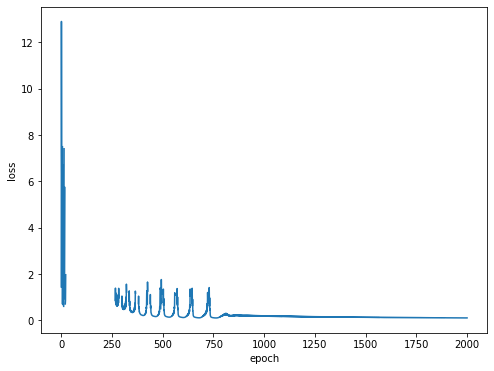

In [33]:
log_reg = Logistic_Regression(verbose=True).fit(X_train, y_train)

In [34]:
print('weights:', log_reg.weights)
print('bias:', log_reg.bias.round(10))

weights: [4.01790816 2.10164541]
bias: -32.2779933838


### **Data Visualization**

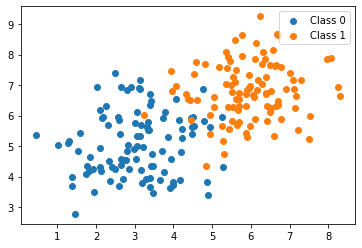

In [35]:
# plot original data
y_pred = log_reg.predict(X)
plt.scatter(x11, x12, label='Class 0')
plt.scatter(x21, x22, label='Class 1')
plt.legend()

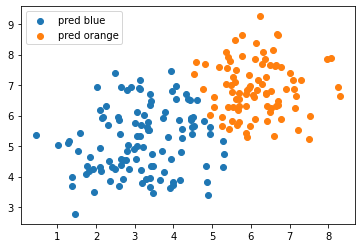

In [36]:
# plot what our model predicts
plt.scatter(X[y_pred < 0.5][:, 0], X[y_pred < 0.5][:, 1], label='pred blue')
plt.scatter(X[y_pred > 0.5][:, 0], X[y_pred > 0.5][:, 1], label='pred orange')
plt.legend()

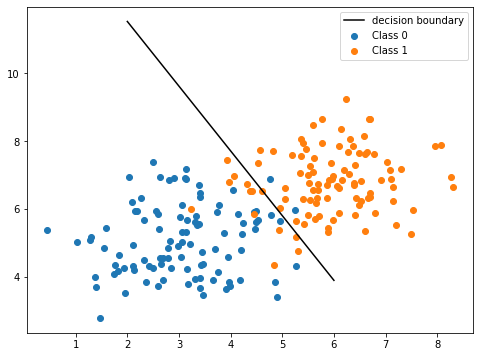

In [37]:
# plot decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(x11, x12, label='Class 0')
plt.scatter(x21, x22, label='Class 1')

slope = - (log_reg.weights[0]/log_reg.weights[1])
intercept = - (log_reg.bias/log_reg.weights[1])
X_plot = np.arange(2, 7)
y_plot = slope * X_plot + intercept
plt.plot(X_plot, y_plot, c='black', label='decision boundary')

plt.legend()

# Which accuracy do you expect to be higher?

In [38]:
# Compute train accuracy - 2 lines
y_pred = log_reg.predict(X_train)
y_pred = y_pred > 0.5
print('Train Accuracy:', accuracy_score(y_train, y_pred))

Train Accuracy: 0.9375


In [39]:
# Compute test accuracy - 2 lines
y_pred = log_reg.predict(X_test)
y_pred = y_pred > 0.5
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.875
